In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# This is the data file with diagnosis info (anonymized)
diagnosis = pd.read_csv('data/ppmi-2018-08-28/Prodromal_Diagnostic_Questionnaire.csv').set_index('PATNO')
diagnosis.head()

,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,PRIMDIAG,OTHNEURO,PSLVL2,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
PATNO,,,,,,,,,,,
10362,408770801,V,SC,PRODDIAG,17,NaN,4,08/2013,2013-08-23 11:37:07.0,NaN,08/2013
10405,605736601,V,SC,PRODDIAG,17,NaN,5,12/2016,2016-12-06 12:45:38.0,NaN,12/2016
10496,410987801,V,SC,PRODDIAG,23,NaN,5,09/2013,2013-09-05 11:40:13.0,NaN,09/2013
10606,409586301,S,SC,PRODDIAG,17,NaN,4,09/2013,2015-06-26 08:19:21.0,NaN,03/2015
10662,448326801,V,SC,PRODDIAG,17,NaN,5,07/2014,2014-07-16 08:08:30.0,NaN,07/2014


In [3]:
# This is the data file with diagnosis codes (anonymized)
codes = pd.read_csv('data/ppmi-2018-08-28/Code_List.csv')
codes.head()

,PAG_NAME,ITM_NAME,CDL_NAME,CODE,DECODE,LAST_UPDATE
0,AE,AEFLUP,YN,0,No,2010-12-06 07:13:10.0
1,AE,AEFLUP,YN,1,Yes,2010-12-06 07:13:10.0
2,AE,AEOUTCOM,AEOUTCOM,1,recovered,2010-12-06 07:13:10.0
3,AE,AEOUTCOM,AEOUTCOM,2,under treatment / observation,2010-12-06 07:13:10.0
4,AE,AEOUTCOM,AEOUTCOM,3,change in AE characteristic,2010-12-06 07:13:10.0


In [4]:
# Find all primary diagnosis codes and remove duplicates
codes = codes[codes['ITM_NAME']=='PRIMDIAG'][['CODE','DECODE']].groupby('CODE').first()
codes

,DECODE
CODE,
01,Idiopathic PD
02,Alzheimer's disease
03,Chromosome-17 frontotemporal dementia
04,Corticobasal degeneration
05,Dementia with Lewy bodies
06,Dopa-responsive dystonia
07,Essential tremor
08,Hemiparkinson/hemiatrophy syndrome
09,Juv. autosomal recessive parkinsonism


In [5]:
# Replace the numeric code in the diagnosis table with the text description above.
diagnosis['PRIMDIAG'] = diagnosis['PRIMDIAG'].map(lambda x:codes.loc['%.2d'%x,'DECODE'])

In [6]:
# This is the data file with smell test info
upsit = pd.read_csv('data/ppmi-2018-08-28/Olfactory_UPSIT.csv').set_index('SUBJECT_ID')
upsit.head()

,PROTOCOL_ID,COMPLT_DATE,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,...,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT,TOTAL_CORRECT,UPSIIT_PRCNTGE
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
90000,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,1,0,1,1,1,1,1,38,98
90001,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,0,1,1,0,1,0,1,30,36
90002,P-PPMI Cohort,03/2013,2,3,2,1,2,1,4,4,...,1,1,1,1,0,1,1,1,28,36
90003,P-PPMI Cohort,04/2013,3,1,1,4,2,4,3,2,...,0,0,0,0,0,0,0,0,8,0
90004,P-PPMI Cohort,04/2013,1,3,2,1,2,3,4,4,...,1,1,0,1,1,1,0,1,32,75


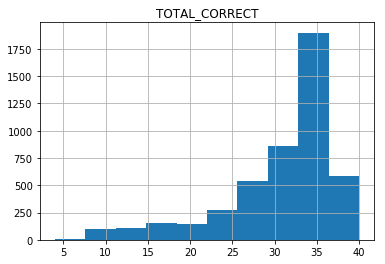

In [7]:
# Here is a histogram of total correct out of 40 for all of the subjects
upsit.hist('TOTAL_CORRECT');

In [8]:
# Merge the two tables using an inner join (only keep indices i.e. patient IDs that exist in both tables)
joined = upsit.join(diagnosis, how='inner')
print('There are %d patients common to both tables.' % joined.shape[0])

There are 407 patients common to both tables.


In [9]:
# Here is a break-down of the patient diagnoses (for all patients we have UPSIT data and diagnoses for).
joined['PRIMDIAG'].value_counts()

Prodromal non-motor PD                      215
No PD nor other neurological disorder       119
Prodromal motor PD                           35
Idiopathic PD                                33
Essential tremor                              2
Other neurological disorder(s) (specify)      2
Progressive supranuclear palsy                1
Name: PRIMDIAG, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


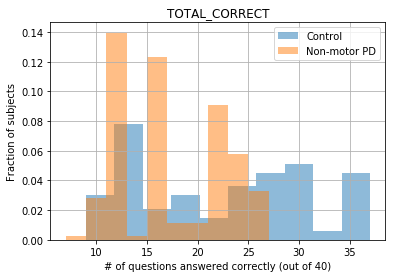

In [10]:
# Here are histograms of (non-motor) PD and controls.  
# You can see that the distributions overlap, but PD usually has worse smell.  
pro_nm_pd = joined[joined['PRIMDIAG']=='Prodromal non-motor PD']
control = joined[joined['PRIMDIAG']=='No PD nor other neurological disorder']
ax = control.hist('TOTAL_CORRECT', normed=True, alpha=0.5, label='Control');
pro_nm_pd.hist('TOTAL_CORRECT', ax=ax, normed=True, alpha=0.5, label='Non-motor PD');
plt.legend()
plt.xlabel('# of questions answered correctly (out of 40)')
plt.ylabel('Fraction of subjects');

In [11]:
# Here are all the columns in the joined table.  
# You can see that there are two columns for each of the 40 questions, one for what the response was, 
# and one for whether it is correct.  
# We should plan to try to predict the eventual diagnosis from this information.
# Eventually we want to incorporate time, so that we can predict future (years later) diagnoses
# from current UPSIT tests.  
list(joined)

['PROTOCOL_ID',
 'COMPLT_DATE',
 'SCENT_10_RESPONSE',
 'SCENT_09_RESPONSE',
 'SCENT_08_RESPONSE',
 'SCENT_07_RESPONSE',
 'SCENT_06_RESPONSE',
 'SCENT_05_RESPONSE',
 'SCENT_04_RESPONSE',
 'SCENT_03_RESPONSE',
 'SCENT_02_RESPONSE',
 'SCENT_01_RESPONSE',
 'SCENT_20_RESPONSE',
 'SCENT_19_RESPONSE',
 'SCENT_18_RESPONSE',
 'SCENT_17_RESPONSE',
 'SCENT_16_RESPONSE',
 'SCENT_15_RESPONSE',
 'SCENT_14_RESPONSE',
 'SCENT_13_RESPONSE',
 'SCENT_12_RESPONSE',
 'SCENT_11_RESPONSE',
 'SCENT_30_RESPONSE',
 'SCENT_29_RESPONSE',
 'SCENT_28_RESPONSE',
 'SCENT_27_RESPONSE',
 'SCENT_26_RESPONSE',
 'SCENT_25_RESPONSE',
 'SCENT_24_RESPONSE',
 'SCENT_23_RESPONSE',
 'SCENT_22_RESPONSE',
 'SCENT_21_RESPONSE',
 'SCENT_40_RESPONSE',
 'SCENT_39_RESPONSE',
 'SCENT_38_RESPONSE',
 'SCENT_37_RESPONSE',
 'SCENT_36_RESPONSE',
 'SCENT_35_RESPONSE',
 'SCENT_34_RESPONSE',
 'SCENT_33_RESPONSE',
 'SCENT_32_RESPONSE',
 'SCENT_31_RESPONSE',
 'SCENT_10_CORRECT',
 'SCENT_09_CORRECT',
 'SCENT_08_CORRECT',
 'SCENT_07_CORRECT',
 'SC

In [12]:
joined.head()

# Find what columns we are interested in
start = joined.columns.get_loc('SCENT_10_CORRECT')
end = joined.columns.get_loc('SCENT_31_CORRECT')

print(start)
print(end)

# Right after this, I split the data into two data frames. 
# It would have been much easier to do all of my column name prep first and
# then split the data frames instead of having to do every operation twice.
# I am going to do that now because it will also make my data more ready for
# classification

# Scratch that. I started doing it and realized I would no longer have the column 
# that tells if the subject was control or got PD. Thank goodness for version control!

42
81


In [13]:
# Make data frames with only those who have PD or do not have PD
NoPD = joined[joined['PRIMDIAG']=='No PD nor other neurological disorder']
PD = joined[joined['PRIMDIAG']=='Prodromal non-motor PD']

#Display all unique primary diagnoses to validate
print(PD['PRIMDIAG'].unique())
print(NoPD['PRIMDIAG'].unique())

['Prodromal non-motor PD']
['No PD nor other neurological disorder']


In [14]:
# Only include columns of interest
correctNoPD = NoPD.iloc[ : , start : end+1]
correctPD = PD.iloc[ : , start:end+1]
correctNoPD.head()

# After this I added the totals row and then fixed the headers
# Instead I am going to fix the headers first, then add the totals row
# This will make future code simpler

,SCENT_10_CORRECT,SCENT_09_CORRECT,SCENT_08_CORRECT,SCENT_07_CORRECT,SCENT_06_CORRECT,SCENT_05_CORRECT,SCENT_04_CORRECT,SCENT_03_CORRECT,SCENT_02_CORRECT,SCENT_01_CORRECT,...,SCENT_40_CORRECT,SCENT_39_CORRECT,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT
10362,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
10405,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,1,0
10606,0,1,1,1,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
10662,0,1,1,1,1,1,1,0,1,0,...,0,1,1,1,0,0,0,0,1,0
10663,1,0,1,1,0,1,1,1,0,0,...,0,1,1,1,1,0,1,1,1,1


In [15]:
# Make the column names just the number to make plot easier to read

headersNoPD = (correctNoPD.columns).tolist()
newHeadersNoPD = [d[6:-8] for d in headersNoPD]
print(newHeadersNoPD)

headersPD = (correctPD.columns).tolist()
newHeadersPD = [d[6:-8] for d in headersPD]


['10', '09', '08', '07', '06', '05', '04', '03', '02', '01', '20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '40', '39', '38', '37', '36', '35', '34', '33', '32', '31']


In [16]:
# Make the names ints so sorting is better
finalHeadersNoPD = [int(float(s)) for s in newHeadersNoPD]
correctNoPD.columns = finalHeadersNoPD

finalHeadersPD = [int(float(s)) for s in newHeadersPD]
correctPD.columns = finalHeadersPD

correctNoPD.tail()

,10,9,8,7,6,5,4,3,2,1,...,40,39,38,37,36,35,34,33,32,31
91249,0,1,1,0,1,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
91548,1,1,1,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
92516,0,1,1,0,1,1,0,1,1,0,...,1,0,0,1,0,0,1,1,0,1
92560,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
92834,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0


In [17]:
# Sort columns by Question Number
correctNoPD = correctNoPD.reindex(sorted(correctNoPD.columns), axis=1)
correctPD = correctPD.reindex(sorted(correctPD.columns), axis=1)
correctNoPD.tail()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
91249,0,1,1,0,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
91548,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
92516,0,1,1,0,1,1,0,1,1,0,...,1,0,1,1,0,0,1,0,0,1
92560,0,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,0
92834,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [18]:
# Add a totals row to the new data frames
totalsNoPD = correctNoPD.append(correctNoPD.sum(numeric_only=True), ignore_index=True)
totalsPD = correctPD.append(correctPD.sum(numeric_only=True), ignore_index=True)
totalsNoPD.tail()

# This code changed the subject index, may need to fix that for future analysis

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
115,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
116,0,1,1,0,1,1,0,1,1,0,...,1,0,1,1,0,0,1,0,0,1
117,0,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,0
118,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
119,35,89,76,77,73,59,65,84,87,55,...,54,48,86,74,75,27,89,76,63,88


In [19]:
# Extract only the total values from each column and each data frame
bar1 = totalsNoPD.values[-1].tolist()
bar2 = totalsPD.values[-1].tolist()
print(bar1)

[35, 89, 76, 77, 73, 59, 65, 84, 87, 55, 87, 74, 62, 41, 55, 75, 81, 58, 73, 63, 83, 25, 75, 69, 45, 49, 38, 60, 82, 76, 54, 48, 86, 74, 75, 27, 89, 76, 63, 88]


In [20]:
# Find the total number of subjects in each group
print(totalsNoPD.shape)
print(totalsPD.shape)

(120, 40)
(216, 40)


In [21]:
# Divide by total number of subjects to get ratio
bar1frac = [x / 120 for x in bar1]
bar2frac = [x / 216 for x in bar2]

In [22]:
#Find the standard error of the means using scipy.sem()
xerr = []
for j in correctNoPD:
    xerr.append(stats.sem(correctNoPD[j]))
    
yerr = []
for k in correctPD:
    yerr.append(stats.sem(correctPD[k]))

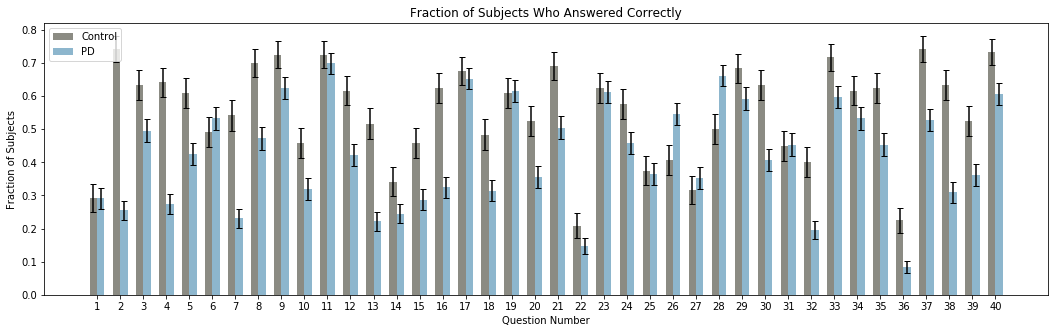

In [23]:
# The plot shows that only a handful of questions were answered correctly more often by those with PD
# Maybe we can see if excluding these questions creates a better classifier
# Also, on some questions, both groups did poorly
# On other questions, there is a significant gap between the fraction of correctness for each group

fig, ax = plt.subplots(figsize=(18, 5))

# Create the scatter plot

# Arrange the groups along the x axis
N = len(totalsPD.columns)
ind = np.arange(N)

# Choose the width of the bars
width = .32       

# Plot the bar plot with the errors
p1 = plt.bar(ind, bar1frac, width, yerr=xerr, align='center', color='#8B8B83', capsize=3, ecolor='k')
p2 = plt.bar(ind + width, bar2frac, width, yerr=yerr, align='center', color='#8DB6CD', capsize=3, ecolor='k')

# Format the plot
ax.set_title('Fraction of Subjects Who Answered Correctly')
plt.ylabel('Fraction of Subjects')
plt.xlabel('Question Number')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(totalsPD.columns)

ax.legend((p1[0], p2[0]), ('Control', 'PD'), loc=2)

plt.show()




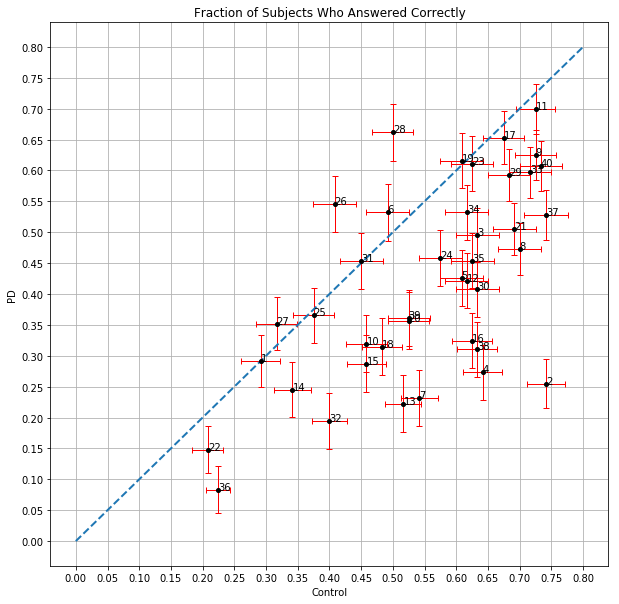

In [24]:
# I do like this visualization a lot better
# It is much more clear that the control group produced more correct answers
# It also emphasizes those questions that the PD group did better on, or the
# ones that both groups performed similarly. It is a lot easier than scanning through the bar graph.
# It also summarizes which questions seemed to be harder or easier overall, as well as the questions
# with the greatest difference in correct response (like question 2 in the lower right corner)
# Also, question 20 and 39 had almost the same results

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))


x = bar1frac # Control
y = bar2frac # PD
n = totalsPD.columns # Question Number

# Plot a scatterplot with error bars
ax.errorbar(x, y, xerr, yerr, fmt='ko', ecolor='red', capsize=3, ms=4, elinewidth=1)

# Plot a dotted line where Control and PD are equal
ax.plot(np.linspace(0,.8), np.linspace(0,.8) , linestyle='dashed', linewidth=2)

# Label each point with the corresponding Question Number
# I think there is a package I can use to make the annotations not overlap if needed
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
# Label the graph
plt.xlabel('Control')
plt.ylabel('PD')
plt.title('Fraction of Subjects Who Answered Correctly')

# Make the axes have the same scale
plt.xticks(np.linspace(0,.8, num=17))
plt.yticks(np.linspace(0,.8, num=17))

plt.grid()
plt.show()

In [25]:
# Start classification

# Prepare data for classification techniques
# Use only columns that we are interested in

# I reuse similar steps as above, and I thought about changing the above code to fit both
# scenarios.
# I could usse the previous data frames, remove the totals columns, and add a PRIMDIAG column
# the combine them, but I would rather just start fresh


# Find what columns we are interested in
start = joined.columns.get_loc('SCENT_10_CORRECT')
end = joined.columns.get_loc('SCENT_31_CORRECT')
print(start, end)

42 81


In [26]:
# Create new dataframe with only correct response columns
newJoined = joined.iloc[:, start:end + 1]
newJoined.head()

,SCENT_10_CORRECT,SCENT_09_CORRECT,SCENT_08_CORRECT,SCENT_07_CORRECT,SCENT_06_CORRECT,SCENT_05_CORRECT,SCENT_04_CORRECT,SCENT_03_CORRECT,SCENT_02_CORRECT,SCENT_01_CORRECT,...,SCENT_40_CORRECT,SCENT_39_CORRECT,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT
10362,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
10405,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,1,0
10496,1,1,1,1,0,1,1,1,0,1,...,1,0,1,1,0,1,1,1,0,0
10606,0,1,1,1,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
10662,0,1,1,1,1,1,1,0,1,0,...,0,1,1,1,0,0,0,0,1,0


In [27]:
# Make the column names just the number to make plot easier to read

headersJ = (newJoined.columns).tolist()
newHeadersJ = [d[6:-8] for d in headersJ]
print(newHeadersJ)

['10', '09', '08', '07', '06', '05', '04', '03', '02', '01', '20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '40', '39', '38', '37', '36', '35', '34', '33', '32', '31']


In [28]:
# Make the names ints so sorting is better
finalHeadersJ = [int(float(s)) for s in newHeadersJ]
newJoined.columns = finalHeadersJ
newJoined.head()

,10,9,8,7,6,5,4,3,2,1,...,40,39,38,37,36,35,34,33,32,31
10362,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
10405,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,1,0
10496,1,1,1,1,0,1,1,1,0,1,...,1,0,1,1,0,1,1,1,0,0
10606,0,1,1,1,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
10662,0,1,1,1,1,1,1,0,1,0,...,0,1,1,1,0,0,0,0,1,0


In [29]:
# Sort columns by Question Number
newJoined = newJoined.reindex(sorted(newJoined.columns), axis=1)
newJoined.head()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
10362,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,1,1
10405,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,1,1
10496,1,0,1,1,1,0,1,1,1,1,...,0,0,1,1,1,0,1,1,0,1
10606,0,1,1,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,1,1
10662,0,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,1,1,1,0


In [30]:
# add on PRIMDIAG column
newJoined['PRIMDIAG'] = joined['PRIMDIAG']
newJoined.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,PRIMDIAG
10362,0,0,0,0,0,1,0,1,0,1,...,0,1,0,1,0,1,1,1,1,No PD nor other neurological disorder
10405,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,1,1,No PD nor other neurological disorder
10496,1,0,1,1,1,0,1,1,1,1,...,0,1,1,1,0,1,1,0,1,Prodromal non-motor PD
10606,0,1,1,0,1,0,1,1,1,0,...,0,0,1,0,1,0,0,1,1,No PD nor other neurological disorder
10662,0,1,0,1,1,1,1,1,1,0,...,1,0,0,0,0,1,1,1,0,No PD nor other neurological disorder


In [31]:
# Convert Joined data PRIMDIAG to binary. 0 for control, 1 for PD
newJoined['PRIMDIAG2'] = np.where(newJoined['PRIMDIAG'] == 'No PD nor other neurological disorder', '0', '1')
newJoined.head()

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,PRIMDIAG,PRIMDIAG2
10362,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,1,1,1,1,No PD nor other neurological disorder,0
10405,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,1,1,1,No PD nor other neurological disorder,0
10496,1,0,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,Prodromal non-motor PD,1
10606,0,1,1,0,1,0,1,1,1,0,...,0,1,0,1,0,0,1,1,No PD nor other neurological disorder,0
10662,0,1,0,1,1,1,1,1,1,0,...,0,0,0,0,1,1,1,0,No PD nor other neurological disorder,0


In [32]:
# Drop the string version of PRIMDIAG
finalJoined = newJoined.drop('PRIMDIAG', 1)
finalJoined.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,PRIMDIAG2
10362,0,0,0,0,0,1,0,1,0,1,...,0,1,0,1,0,1,1,1,1,0
10405,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,1,1,0
10496,1,0,1,1,1,0,1,1,1,1,...,0,1,1,1,0,1,1,0,1,1
10606,0,1,1,0,1,0,1,1,1,0,...,0,0,1,0,1,0,0,1,1,0
10662,0,1,0,1,1,1,1,1,1,0,...,1,0,0,0,0,1,1,1,0,0


In [33]:
# The data
y = finalJoined['PRIMDIAG2'].tolist()
final = finalJoined.drop('PRIMDIAG2', 1)
n = final.count
X = final.values
final.head()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
10362,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,1,1
10405,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,1,1
10496,1,0,1,1,1,0,1,1,1,1,...,0,0,1,1,1,0,1,1,0,1
10606,0,1,1,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,1,1
10662,0,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,1,1,1,0


In [34]:
# Try Support Vector Machine
from sklearn.svm import SVC

classifier = SVC(probability=True)
classifier.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# Test the classifier with one data point
testX = final.loc[10362, : ].tolist()
testY = finalJoined.at[10362,'PRIMDIAG2']
print(testX)
print(testY)
print(classifier.predict([testX]))


[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
0
['1']


In [36]:
# Score of the classifier should be better than mean
classifier.score(X,y)

0.8402948402948403

In [37]:
# Mean of the data
finalJoined['PRIMDIAG2'].astype(float).mean()

0.7076167076167076

In [38]:
# What do these probabilities mean, and what can I use them for?
probas = classifier.predict_proba(X)
# print(probas)

In [39]:
# Find the ROC curve for SVM

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = classifier.decision_function(X)
yTrue = [int(float(s)) for s in y]
fpr, tpr, _ = roc_curve(yTrue, y_score)
roc_auc = auc(fpr, tpr)

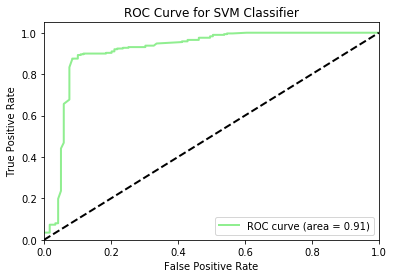

In [40]:
# Plot the ROC curve for SVM
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Try classification using Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X,y)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [42]:
# Score should be better than 0.7076167076167076
clf.score(X,y)

0.8943488943488943

In [43]:
# Find the ROC Curve for LDA
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf.decision_function(X)
yTrue = [int(float(s)) for s in y]
fpr, tpr, _ = roc_curve(yTrue, y_score)
roc_auc = auc(fpr, tpr)


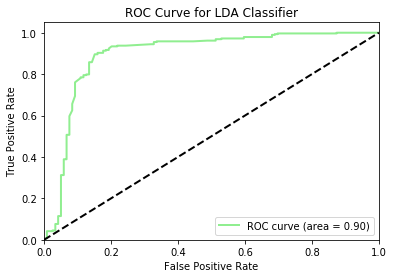

In [44]:
# Plot the ROC Curve for LDA
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Classifier')
plt.legend(loc="lower right")
plt.show()

In [45]:
# Test the classifier with one data point
testX = final.loc[10362, : ].tolist()
testY = finalJoined.at[10362,'PRIMDIAG2']
print(testX)
print(testY)
print(clf.predict([testX]))

[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
0
['1']


In [46]:
# Try Quadratic Discriminant Analysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [47]:
# Score of the QDA
clf2.score(X,y)

0.9287469287469288

In [48]:
# Find the ROC curve for QDA
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf2.decision_function(X)
yTrue = [int(float(s)) for s in y]
fpr, tpr, _ = roc_curve(yTrue, y_score)
roc_auc = auc(fpr, tpr)

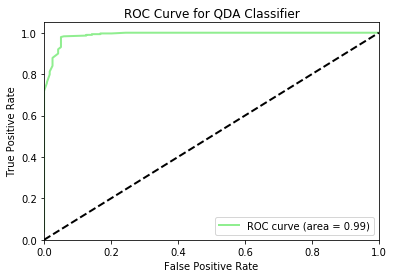

In [49]:
# Plot the ROC Curve for QDA
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for QDA Classifier')
plt.legend(loc="lower right")
plt.show()

In [50]:
# Test the classifier with one data point
testX = final.loc[10362, : ].tolist()
testY = finalJoined.at[10362,'PRIMDIAG2']
print(testX)
print(testY)
print(clf2.predict([testX]))

[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
0
['0']
